In [1]:
from __future__ import print_function, division
from builtins import range
import gym
from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

In [3]:
def play_one_episode(env, params):
    observation = env.reset()
    done = False
    t = 0
    
    while not done and t < 10000:  #< 200 #<10000
        #env.render()
        t += 1
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        if done:
            break
            
    return t

In [4]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    
    for i in range(T):
        episode_lengths[i] = play_one_episode(env, params)
        
    avg_length = episode_lengths.mean()
    print("Avg lenght:", avg_length)
    return avg_length

In [5]:
def random_search(env):
    episode_lenghts = []
    best = 0
    params = None
    for t in xrange(100):
        new_params = np.random.random(4)*2 - 1
        avg_lenght = play_multiple_episodes(env, 100, new_params)
        episode_lenghts.append(avg_lenght)
        
        if avg_lenght > best:
            params = new_params
            best = avg_lenght
    return episode_lenghts, params

[2017-10-14 05:54:17,670] Making new env: CartPole-v0


Avg lenght: 200.0
Avg lenght: 9.01
Avg lenght: 30.15
Avg lenght: 25.49
Avg lenght: 9.81
Avg lenght: 54.74
Avg lenght: 9.45
Avg lenght: 41.0
Avg lenght: 9.9
Avg lenght: 9.16
Avg lenght: 8.94
Avg lenght: 8.85
Avg lenght: 45.11
Avg lenght: 9.54
Avg lenght: 9.49
Avg lenght: 9.18
Avg lenght: 46.23
Avg lenght: 9.67
Avg lenght: 53.49
Avg lenght: 9.33
Avg lenght: 9.16
Avg lenght: 127.68
Avg lenght: 9.13
Avg lenght: 156.49
Avg lenght: 58.6
Avg lenght: 54.18
Avg lenght: 9.53
Avg lenght: 9.1
Avg lenght: 83.04
Avg lenght: 16.33
Avg lenght: 122.68
Avg lenght: 66.4
Avg lenght: 27.95
Avg lenght: 83.44
Avg lenght: 9.66
Avg lenght: 86.14
Avg lenght: 95.02
Avg lenght: 184.99
Avg lenght: 8.96
Avg lenght: 8.97
Avg lenght: 49.18
Avg lenght: 197.3
Avg lenght: 9.57
Avg lenght: 185.69
Avg lenght: 66.12
Avg lenght: 9.51
Avg lenght: 8.99
Avg lenght: 9.53
Avg lenght: 9.63
Avg lenght: 8.99
Avg lenght: 9.51
Avg lenght: 90.98
Avg lenght: 55.19
Avg lenght: 9.74
Avg lenght: 20.32
Avg lenght: 9.41
Avg lenght: 8.94
Avg

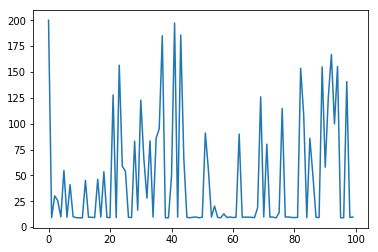

[2017-10-14 05:54:20,776] Creating monitor directory ./carPole_savedVideo
[2017-10-14 05:54:20,790] Starting new video recorder writing to /notebooks/notebooks/carPole_savedVideo/openaigym.video.0.382.video000000.mp4


***Final run with final weights***


[2017-10-14 05:54:23,520] Starting new video recorder writing to /notebooks/notebooks/carPole_savedVideo/openaigym.video.0.382.video000001.mp4
[2017-10-14 05:54:25,388] Starting new video recorder writing to /notebooks/notebooks/carPole_savedVideo/openaigym.video.0.382.video000008.mp4
[2017-10-14 05:54:27,288] Starting new video recorder writing to /notebooks/notebooks/carPole_savedVideo/openaigym.video.0.382.video000027.mp4
[2017-10-14 05:54:29,222] Starting new video recorder writing to /notebooks/notebooks/carPole_savedVideo/openaigym.video.0.382.video000064.mp4


Avg lenght: 200.0


In [6]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    episode_lenghts, params = random_search(env)
    plt.plot(episode_lenghts)
    plt.show()
    
    # play a final set of episodes
    env = wrappers.Monitor(env, './carPole_savedVideo')
    print("***Final run with final weights***")
    play_multiple_episodes(env, 100, params)